# **Práctica 1: Análisis de redes con NetworkX**

En esta práctica vamos a calcular algunos parámetros de un grafo de pequeño tamaño, a continuación, vamos a cargar una red de interacción de proteínas, vamos a calcular sus principales parámetros mediante NetworkX y vamos a compararlos con los de un grafo aleatorio que tenga un número similar de nodos y ramas.

## Apartado 1

Este ejercicio debe realizarse con lápiz y papel (o con lápiz y Word) ya que debéis indicar los cálculos que habéis realizado.

**1. Representad el siguiente grafo dirigido mediante (a) una matriz de adyacencia y (b) una lista de adyacencia.**

(a) Matriz de adyacencia
<pre>
0	1	0	0	1	0	0	0	0	1
0	0	0	0	0	0	0	0	0	0
0	0	0	1	0	0	0	0	0	0
0	1	0	0	1	0	0	0	0	0
1	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	1	1
0	0	0	0	0	1	0	1	1	0
0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	1	0	0
1	0	0	0	0	1	0	0	0	0
</pre> 

(b) Lista de adyacencia

<pre>
1 → 2, 5, 10
2
3 → 4 
4 → 2, 5
5 → 1
6 → 9, 10
7 → 6, 8, 9
8
9 → 6, 8
10 → 1, 6
</pre>
<br>

**2. Responded a las siguientes preguntas:**

**a. ¿Es ponderado?**

No, ya que las ramas no tienen pesos asignados.

**b. ¿Es conexo?**

No, ya que, debido a que se trata de un grafo dirigido, hay nodos desde los que no se puede ir a otros. Por ejemplo, desde $V_2$ no se puede ir a otros nodos. 

**c. ¿Es débilmente conexo?**

Sí, ya que, obviando la cardinalidad, se puede ir desde cualquier nodo a otro.

**d. ¿Cuál es su tamaño y su orden?**

El tamaño es de 16 (número de ramas) y el orden es de 10 (número de nodos). 

**e. ¿Tiene algún punto de articulación? En caso positivo, indica cual.**

Considerando que se trata de un grafo no dirigido, hay 3 puntos de articulación: $V_4$, $V_1$, $V_{10}$ y $V_6$.

**f. ¿Tiene lazos?**

No, no presenta ningún lazo. (Un lazo o bucle es que una rama sale y vuelve al mismo nodo. En este grafo no hay ninguno.)


**g. ¿El grafo tiene algún ciclo? En caso positivo, indica cual.**

Un ciclo es un circuito en el que no repetimos vértices, es decir, debemos salir de un punto y volver a él sin repetir ramas ni vértices. En este grafo podemos observar 4 ciclos: 

* $V_5-V_1$
* $V_5-V_{10}$
* $V_{10}-V_6$
* $V_6-V_9$

**h. ¿Existe algún camino entre los nodos 4 y 7? En caso positivo, indica cual es y su longitud.**

Teniendo en cuenta que se trata de un grafo dirigido, no existe un camino entre los nodos 4 y 7. 

**i. ¿Existe algún camino entre los nodos 3 y 9? En caso positivo, indica cual es y su longitud.**

Desde el nodo 3 al 9 sí existe un camino. 


Considera ahora el grafo como un grafo no dirigido.

**a. ¿El grafo tiene algún ciclo? En caso positivo, indica cual.**

El grafo no dirigido presenta 3 ciclos. 

**b. ¿Cuál es el mayor valor de k para el cual existe un k-core?.**

El mayor valor de $k$ con el que se puede construir un k-core es 2.

**c. Calcula el índice de clusterización del nodo 10. Calcula el camino carácterístico del nodo 10.**

**d. Calcula el camino carácterístico del nodo 10.**


**e. Existe algún cliqué de orden mayor de 2. En caso positivo, indica los nodos que lo componen.**

No, no existe ningún cliqué de grado mayor de 2.  


## Apartado 2

Análisis de una red de interacción de proteínas mediante NetworkX.

**1. Descargad de Moodle el grafo CaernoElegans-LC_uw.txt, el grafo contiene una red de interacción de proteínas correspondiente al gusano _Caernobidis elegans_.**

**2. El fichero que contiene la red está en formato lista de ramas, por tanto, cargad el grafo en una variable G_CE mediante la función read_edgelist("CL-LC_uw.txt").**

**3. Obtened e imprimid por la salida el orden y el tamaño del grafo y averiguad si el grafo es dirigido o no. ¿Es un grafo denso o disperso?**

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

%matplotlib inline

In [35]:
# cargamos los datos del fichero CaernoElegans-LC_uw.txt
G_CE = nx.read_edgelist("CaernoElegans-LC_uw.txt")

n = nx.number_of_nodes(G_CE)
m = nx.number_of_edges(G_CE)
info = nx.info(G_CE)
dens = nx.density(G_CE)

display(Markdown("""
Respecto al orden y el tamaño del grafo, estas métricas pueden calcularse a través de las funciones
``nx.number_of_nodes()`` y ``nx.number_of_edges()``. Los resultados son los siguientes:

* Orden del grafo: {0}
* Tamaño del grafo: {1}

Ambas métricas ser calculadas también mediante  ``nx.is_directed()``, función que devuelve también
el grado medio del grafo:

<pre>{2}
\n</pre>


Respecto a si se trata de un grafo denso o disperso, podemos saberlo a través de la función ``nx.density()``. 
Dicha función nos devolverá el coeficiente de densidad, a partir del cual podemos inferir si es denso o no:

* En el caso de que los valores sean cercanos a 1, se trata de un grafo denso.
* En el caso de que los valores se acerquen a 0, será disperso. 

**Aquí tengo en los apuntes que se puede establecer un umbral con log2(), comentar**

En este caso, podemos observar como el coeficiente de densidad es igual a {3}, por lo que se trata de un grafo disperso.

<br>
                 """.format(n, m, info, dens)))



Respecto al orden y el tamaño del grafo, estas métricas pueden calcularse a través de las funciones
``nx.number_of_nodes()`` y ``nx.number_of_edges()``. Los resultados son los siguientes:

* Orden del grafo: 1387
* Tamaño del grafo: 1648

Ambas métricas ser calculadas también mediante  ``nx.is_directed()``, función que devuelve también
el grado medio del grafo:

<pre>Name: 
Type: Graph
Number of nodes: 1387
Number of edges: 1648
Average degree:   2.3764

</pre>


Respecto a si se trata de un grafo denso o disperso, podemos saberlo a través de la función ``nx.density()``. 
Dicha función nos devolverá el coeficiente de densidad, a partir del cual podemos inferir si es denso o no:

* En el caso de que los valores sean cercanos a 1, se trata de un grafo denso.
* En el caso de que los valores se acerquen a 0, será disperso. 

**Aquí tengo en los apuntes que se puede establecer un umbral con log2(), comentar**

En este caso, podemos observar como el coeficiente de densidad es igual a 0.001714539566017576, por lo que se trata de un grafo disperso.

<br>
                 


**4. Cread un grafo aleatorio G_AL que tenga el mismo orden y tamaño que el grafo que acabáis de cargar mediante la función gnm_random_graph(n,m)**

**5. Indica si ambos grafos son conexos.**



In [13]:
G_random = nx.gnm_random_graph(n, m)

print(nx.is_connected(G_CE))
print(nx.is_connected(G_random))

## búsqueda en anchura?
print(nx.number_connected_components(G_CE))
print(nx.number_connected_components(G_random))


False
False
89
152


6. ¿Cuál es el nodo con mayor grado en cada grafo?
7. ¿Cuál es la máxima distancia entre dos nodos del grafo (diámetro del grafo)?

**Nota:** Para visualizarlo o usar kamada_.. o exportar a Gephy

In [53]:
## aproximación de mierda
x = dict(nx.degree(G_CE))
m = max(x.values())

for pos, i in enumerate(x.values()):
    if i == m:
        print(pos)

## nodo
list(x.keys())[14]

## posición
x[list(x.keys())[14]]


# ## aproximación buena
max(x.items(), key = lambda k: k[1])


14


('T08G11.5', 131)

In [41]:

## meter en un assert o un try
nx.diameter(G_CE)

NetworkXError: Found infinite path length because the graph is not connected

## Apartado 3

Distribución del grado de los nodos.
1. Visualizad la distribución del grado de los nodos de ambos grafos.
2. ¿Son iguales las gráficas de distribución de grados de ambos grafos?, ¿Qué conclusión sacas de lo anterior?
3. Dibuja ahora la distribución del grado de los nodos de la red de interacción de proteínas usando escala logarítmica en ambos ejes, añade para ello estas dos líneas de código para cambiar el tipo de escala en cada eje
    ``plt.xscale("log", nonposx='clip')``
    ``plt.yscale("log", nonposy='clip')``
4. ¿Qué tipo de gráfica obtienes? ¿Podrías calcular aproximadamente la pendiente de los datos?

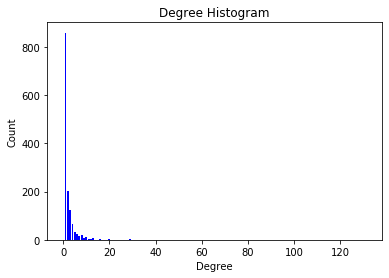

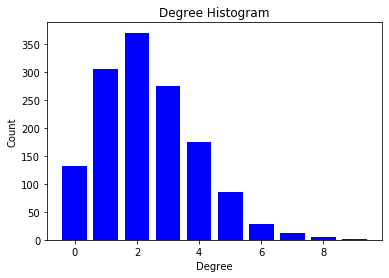

In [55]:
L = nx.degree_histogram(G_CE)
plt.bar(range(len(L)),L, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

L = nx.degree_histogram(G_random)
plt.bar(range(len(L)),L, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()